In [116]:
import pandas as pd
import sqlite3 as sql



# Data Preprocessing

# 1. Load Listening History (Train Triplets)

In [3]:
#train_triplets --> user listening history (the 3GB one)

file_name='train_triplets.txt'
df=pd.DataFrame()
chunksize=10**8 # load by chunk to save memory
for chunk in pd.read_csv(file_name,chunksize=chunksize,sep='\t',names=['user_id','song_id','frequency']):
    df=df.append(chunk)

In [4]:
df.head()

,user_id,song_id,frequency
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [5]:
# count distinct song numbers 
df.song_id.nunique()

384546


There are 384546 unique songs in the original taste profile.

In [6]:
# unique_tracks --> map song id to track id

df_track = pd.read_csv("unique_tracks.txt", header=None, sep='<SEP>',
                       names=['track_id', 'song_id', 'artist_name', 'title'])

<ipython-input-6-3619619c787c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_track = pd.read_csv("unique_tracks.txt", header=None, sep='<SEP>',


In [7]:
len(df_track)

1000000

It includes all 100 Thousand song tracks.

In [8]:
df=df.merge(df_track,how='inner',on='song_id')
df.head()

,user_id,song_id,frequency,track_id,artist_name,title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove


In [9]:
df_m=pd.read_csv('mxm_779k_matches.txt',header=None ,comment='#'
                ,sep='<SEP>',names=['track_id','artist_name','title','mxm_id', 'mxm_artist_name', 'mxm_title'])
df_m = df_m[['track_id', 'mxm_id', 'mxm_artist_name', 'mxm_title']]
df_m.head()

<ipython-input-9-af3531124826>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_m=pd.read_csv('mxm_779k_matches.txt',header=None ,comment='#'


,track_id,mxm_id,mxm_artist_name,mxm_title
0,TRMMMKD128F425225D,4418550.0,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,8898149.0,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,9239868.0,Yerba Brava,Si vos queres
3,TRMMMXN128F42936A5,5346741.0,Franz Berwald,"Symphony No. 1 in G minor ""Sinfonie Sérieuse"":..."
4,TRMMMBB12903CB7D21,2511405.0,Kris Kross,2 Da Beat Ch'yall


In [12]:
len(df_m)

779056

In [13]:
# merge on track_id
df_all=df.merge(df_m,how='left',on='track_id')
df_all.song_id.nunique()

384546

In [16]:
df_all

,user_id,song_id,frequency,track_id,artist_name,title,mxm_id,mxm_artist_name,mxm_title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
...,...,...,...,...,...,...,...,...,...
49664523,7e5ee985d8df64ef746a8c374357d7f39ccfcb61,SOJLGCD12A6D4F4A7C,1,TRSZCYV128F1467F70,Fad Gadget,The Ring,1480422.0,Fad Gadget,The Ring
49664524,ac96070188fa5618d5e1595937f6e02b4ab4a4fa,SONYEUK12A8C13E9A4,1,TRHPXTA128F428EFA2,Joe Veras,Mi Dueña,9631729.0,Kany García,Mi Dueña
49664525,b691b8eda35349ebaf4801c5c56a399273b6157c,SOUSSCZ12A8C131D83,2,TRRIYUS128F423F27F,Rez Band,Concert For A Queen,1899140.0,Resurrection Band,Concert for a Queen
49664526,12bce146f59c4e6d32e1a460468197cfd7cf14e8,SOKSHWF12AB018B8CC,3,TRBVDMB12903CC45BB,Tim Rushlow,Then There's Me (LP Version),1661619.0,Tim Rushlow,Then There's Me


In [22]:
# save unique id pairs as seeds
seeds=df_all[['song_id','track_id','mxm_id']]
seeds.drop_duplicates()
seeds.reset_index(drop=True, inplace=True)
seeds.to_csv("seeds.csv", index=False)

In [23]:
# save the listening history

df_all = df_all[['user_id', 'track_id', 'frequency']]

In [25]:
df_all.to_csv("listening_history.csv", index=False)

# For track information

In [27]:
df = pd.read_csv("seeds.csv")


In [28]:
# place SQL results in a DataFrame 
connection = sql.Connection("track_metadata.db")
query = 'SELECT * FROM songs'
meta = pd.read_sql_query(query, con=connection)

In [29]:
meta

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,SOTXAME12AB018F136,Pacha V.I.P.,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,217.44281,0.528617,0.411595,0,7522478,-1,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,SOXQYIQ12A8C137FBB,Naale Baba Lassi Pee Gya,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,244.16608,0.401500,0.374866,0,1632096,-1,0
999997,TRYYYMG128F4260ECA,Novemba,SOHODZI12A8C137BB3,Dub_Connected: electronic music,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,553.03791,0.556918,0.336914,0,2219291,-1,0
999998,TRYYYDJ128F9310A21,Faraday,SOLXGOR12A81C21EB7,The Trance Collection Vol. 2,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,484.51873,0.403668,0.256935,0,5472456,-1,0


In [30]:
meta = meta[meta.track_id.isin(df.track_id)].reset_index(drop=True)

# drop last three columns
meta = meta.iloc[:, :-3]

meta.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998


In [31]:
# save metadata
meta.to_csv("tracks_metadata.csv", index=False)

# For Artists

In [34]:
# artist tags database

connection = sql.Connection("artist_term.db")
query = 'SELECT * FROM artist_mbtag'
artist = pd.read_sql_query(query, con=connection)
artist

,artist_id,mbtag
0,AR002UA1187B9A637D,uk
1,AR002UA1187B9A637D,rock
2,AR002UA1187B9A637D,garage rock
3,AR006821187FB5192B,bass
4,AR00A6H1187FB5402A,detroit
...,...,...
24772,ARZZMWO1187B9AFB36,usa
24773,ARZZMWO1187B9AFB36,metal
24774,ARZZXT51187FB4627E,classic pop and rock
24775,ARZZYRB1187B99D0B6,jazz


In [35]:
# combine rows into lists

artist = artist.groupby("artist_id")['mbtag'].apply(list).reset_index(name='tags')

In [36]:
artist

,artist_id,tags
0,AR002UA1187B9A637D,"[uk, rock, garage rock]"
1,AR006821187FB5192B,[bass]
2,AR00A6H1187FB5402A,"[detroit, punk, michigan, usa]"
3,AR00B1I1187FB433EB,"[european, swedish, classic pop and rock]"
4,AR00FVC1187FB5BE3E,"[german, berlin]"
...,...,...
8833,ARZZ8O71187FB45FA4,"[punk, france]"
8834,ARZZMLS1187FB4F46C,[rock and indie]
8835,ARZZMWO1187B9AFB36,"[grindcore, new york, usa, metal]"
8836,ARZZXT51187FB4627E,[classic pop and rock]


In [37]:
artist2=pd.read_csv('artist_location.txt', header=None,
                   sep='<SEP>', names=['artist_id','lng','lat','artist_name','place'])

<ipython-input-37-3d265d08f70d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  artist2=pd.read_csv('artist_location.txt', header=None,


In [38]:
artist2

,artist_id,lng,lat,artist_name,place
0,ARZGXZG1187B9B56B6,-16.96595,-61.14804,Endless Blue,Santa Cruz
1,AR8K6F31187B99C2BC,46.44231,-93.36586,Go Fish,"Twin Cities, MN"
2,ARHJJ771187FB5B581,51.59678,-0.33556,Screaming Lord Sutch,"Harrow, Middlesex, England"
3,ARJ8YLL1187FB3CA93,40.69626,-73.83301,Morton Gould,"Richmond Hill, NY"
4,ARYBAGV11ECC836DAC,43.58828,-79.64372,Crash Parallel,Mississauga
...,...,...,...,...,...
13845,ARY5A5U1187B9B2C08,34.05349,-118.24532,Rose Royce,"Los Angeles, CA"
13846,AR02X7I1187FB41C6F,48.85692,2.34121,Shonky,Paris/Berlin
13847,ARJWB0K1187FB4D6ED,-36.55865,145.46900,Xavier Rudd,"Victoria, Australia"
13848,ARNEL2O1187FB4421A,33.89627,-89.00018,Bukka White,"Houston, MS"


In [39]:
artist = artist.merge(artist2, how='left', on='artist_id')
# select artist in our listening history

artist = artist[artist.artist_id.isin(meta.artist_id)].reset_index(drop=True)
artist.drop(columns='artist_name', axis=1, inplace=True)

In [40]:
artist

,artist_id,tags,lng,lat,place
0,AR00B1I1187FB433EB,"[european, swedish, classic pop and rock]",NaN,NaN,NaN
1,AR00FVC1187FB5BE3E,"[german, berlin]",25.67084,-100.30953,"Monterrey, NL, México"
2,AR00IKC1187FB37BD5,"[uk, scotland, edinburgh, punk, anarcho]",NaN,NaN,NaN
3,AR00M9H1187B9B59CA,[virgin islands reggae],47.67885,-122.20724,"Kirkland, WA"
4,AR00P3M1187FB5428C,[british],NaN,NaN,NaN
...,...,...,...,...,...
7709,ARZZ8261187FB48F00,"[slam poetry, french, france, francophone, spo...",NaN,NaN,NaN
7710,ARZZMLS1187FB4F46C,[rock and indie],30.42084,-87.21724,"Pensacola, FL"
7711,ARZZMWO1187B9AFB36,"[grindcore, new york, usa, metal]",40.71455,-74.00712,"New York, NY"
7712,ARZZXT51187FB4627E,[classic pop and rock],NaN,NaN,NaN


In [42]:
artist.to_csv("artist.csv", index=False)

# Lyrics

In [44]:
connection = sql.Connection("lyrics.db")
query = 'SELECT * FROM words'
words = pd.read_sql_query(query, con=connection)

In [45]:
words

,word
0,i
1,the
2,you
3,to
4,and
...,...
4995,santo
4996,pe
4997,gee
4998,colleg


In [46]:
words.to_csv("word_list.csv")


In [47]:
query = 'SELECT * FROM lyrics'
lyrics = pd.read_sql_query(query, con=connection)

In [48]:
lyrics.head(10)

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0
5,TRAAAAV128F421A322,4623710,a,3,0
6,TRAAAAV128F421A322,4623710,me,1,0
7,TRAAAAV128F421A322,4623710,it,1,0
8,TRAAAAV128F421A322,4623710,my,1,0
9,TRAAAAV128F421A322,4623710,is,2,0


In [50]:
lyrics.to_csv("lyrics.csv")

# Preprocessing

In [117]:
df=pd.read_csv("lyrics.csv")
track=pd.read_csv("tracks_metadata.csv")

In [118]:
df.head()

,Unnamed: 0,track_id,mxm_tid,word,count,is_test
0,0,TRAAAAV128F421A322,4623710,i,6,0
1,1,TRAAAAV128F421A322,4623710,the,4,0
2,2,TRAAAAV128F421A322,4623710,you,2,0
3,3,TRAAAAV128F421A322,4623710,to,2,0
4,4,TRAAAAV128F421A322,4623710,and,5,0


In [119]:
track.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998


# Lyrics Preprocessing

1. Data Consolidation

Because the lyrics are in the form of tokenization for each unique track, I aggregate all the tokens together for every track. Now, each track has a full version of lyric

In [120]:
df['words']=df.apply(lambda row: (row['word']+' ')*row['count'],axis=1)
df_new = df[['track_id','words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyric')

In [121]:
# Import nltk package
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elyasm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/elyasm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/elyasm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
stopwords = stopwords.words('english')

In [123]:
#Clean text
import re
from nltk.corpus import stopwords

# Define a function to clean text
def preprocessing_text(lyric):
    my_stopwords = stopwords.words('english')
    wnl = nltk.WordNetLemmatizer()
    tag_remove = re.compile(r'<[^>]+>')
    review = tag_remove.sub('', lyric)
    tokens = nltk.word_tokenize(lyric)
    words =  [w.lower() for w in tokens if w.isalpha() if w.lower() not in my_stopwords]
    stem = [wnl.lemmatize(w) for w in words]
    clean_text = ' '.join(w for w in stem)
    return clean_text

In [124]:
df_new['lyric'] = df_new['lyric'].apply(lambda x:preprocessing_text(x))  # Apply function to preprocess lyrics

In [125]:
df_new  # Show preprocessed lyrics

,track_id,lyric
0,TRAAAAV128F421A322,like like de got would seem someon understand ...
1,TRAAABD128F429CF47,know know know know know time time time la la ...
2,TRAAAED128E0783FAB,love love love love love love love love love l...
3,TRAAAEF128F4273421,know got got got feel let would would would ey...
4,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...
...,...,...
237657,TRZZZXA128F428ED56,time la get eye think give dream wo wo head so...
237658,TRZZZXV128F4289747,know like like like time get get get never bac...
237659,TRZZZYV128F92E996D,get get get get get get get get get get get ge...
237660,TRZZZYX128F92D32C6,know know time time time go go go go go go go ...


In [126]:
text = ' '.join(df_new['lyric'])         # Joining all the lyrics together

# Lyrics Visulization with WordCloud

In this section, I visualized the top popular lyrics of all time with WordCloud.

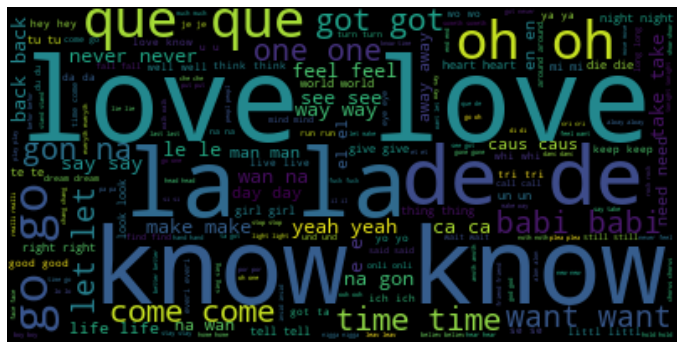

In [132]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordCloud_caption = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = len(text)).generate(text)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_caption,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Tokenization Text

In [133]:
text_token = [i for i in text.split(',') if i !='']

# Visualize top 30 words popular in lyrics for all time

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


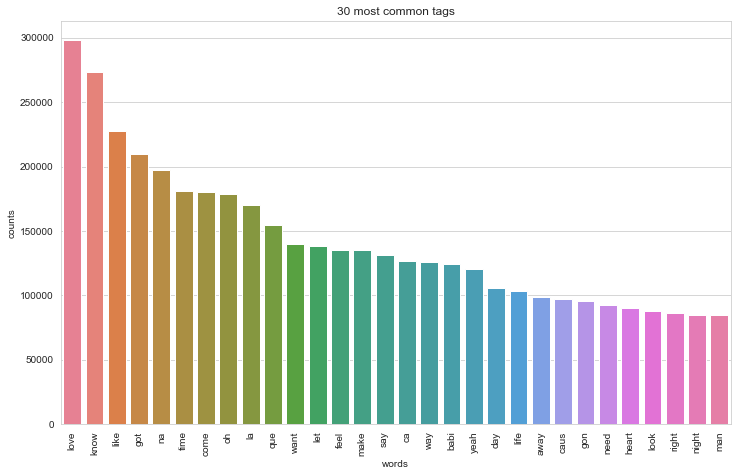

In [134]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(12, 12/1.6180))
    plt.subplot(title='30 most common tags')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text_token)
# Visualise the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer)

# Visualize lyric trends over time (1950s - 2000s)

Prepare data for visualization:

Join year and track ID together

Split the data by years (2000s, 90s, 80s, 70s, 60s, 50s)

In [135]:
# Merge year and track ID together
df_lyrics = df_new.merge(track[['track_id','year']], how="inner", on="track_id")

In [136]:
df_lyrics.head()


,track_id,lyric,year
0,TRAAAAV128F421A322,like like de got would seem someon understand ...,2005
1,TRAAABD128F429CF47,know know know know know time time time la la ...,1969
2,TRAAAED128E0783FAB,love love love love love love love love love l...,0
3,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...,0
4,TRAAAFD128F92F423A,one got never feel way way take would away awa...,2007


In [137]:
# Split the data by years
# 2000s
df_2000 = df_lyrics[df_lyrics['year']>=2000]
# 1990s
df_1990 = df_lyrics[(df_lyrics['year']<2000) & (df_lyrics['year']>=1990)]
# 1980s
df_1980 = df_lyrics[(df_lyrics['year']<1990) & (df_lyrics['year']>=1980)]
# 1970
df_1970 = df_lyrics[(df_lyrics['year']<1980) & (df_lyrics['year']>=1970)]
# 1960
df_1960 = df_lyrics[(df_lyrics['year']<1970) & (df_lyrics['year']>=1960)]
# 1950 or smaller
df_1950 = df_lyrics[(df_lyrics['year']<1960)]

# Top 30 popular words in lyric of the 2000s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


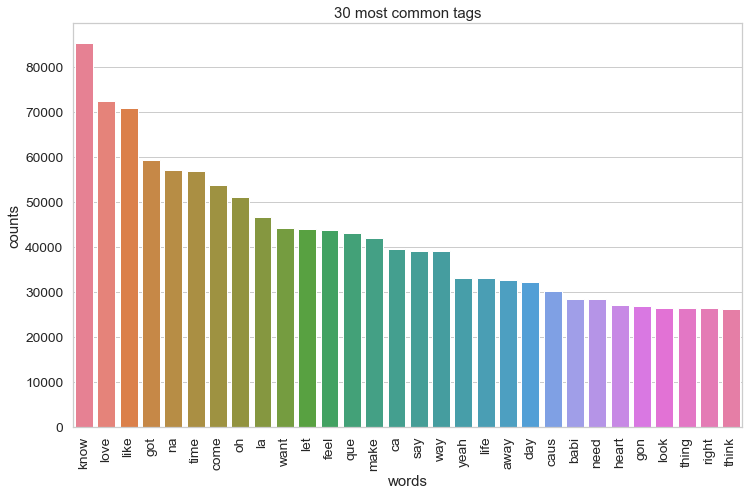

In [138]:
# Merge lyrics of 2000-2011
text_2000 = ' '.join(df_2000['lyric'])
# Tokenization
text_token_2000 = [i for i in text_2000.split(',') if i !='']
# Fit and transform the processed titles
count_data_2000 = count_vectorizer.fit_transform(text_token_2000)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_2000, count_vectorizer)

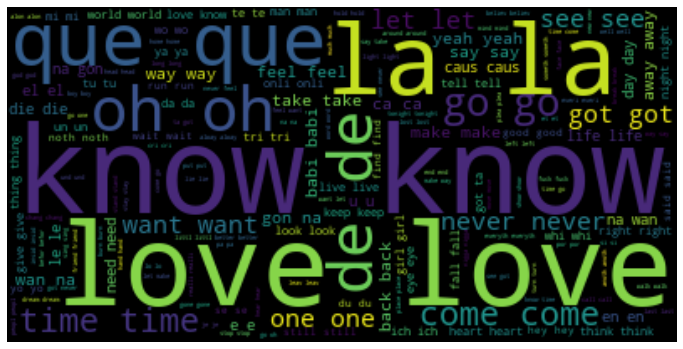

In [139]:
wordCloud_2000 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_2000)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_2000,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Top 30 popular words in lyric of the 90s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


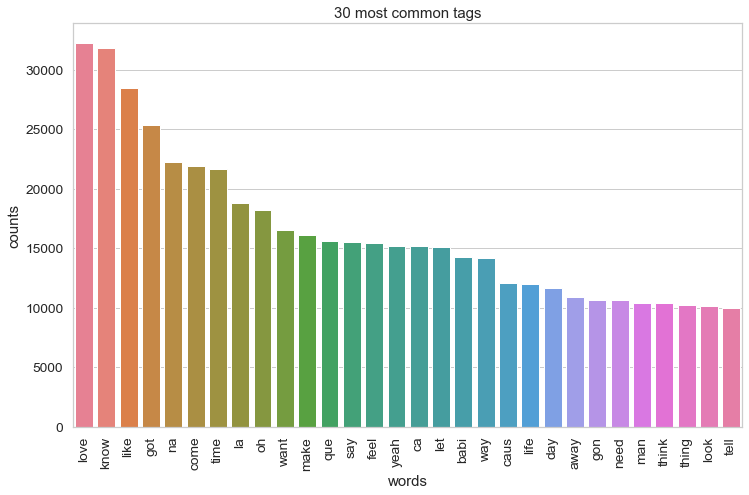

In [140]:

# Combine all the lyrics into one text
text_1990 = ' '.join(df_1990['lyric'])
# Tokenization
text_token_1990 = [i for i in text_1990.split(',') if i !='']
# Fit and transform the processed titles
count_data_1990 = count_vectorizer.fit_transform(text_token_1990)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1990, count_vectorizer)

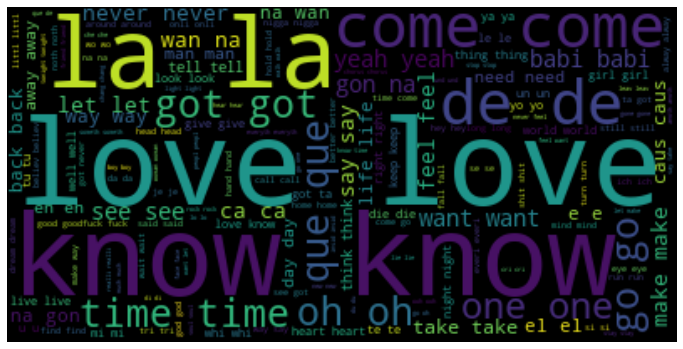

In [141]:

wordCloud_1990 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1990)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1990,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 opular words in lyric of the 80s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


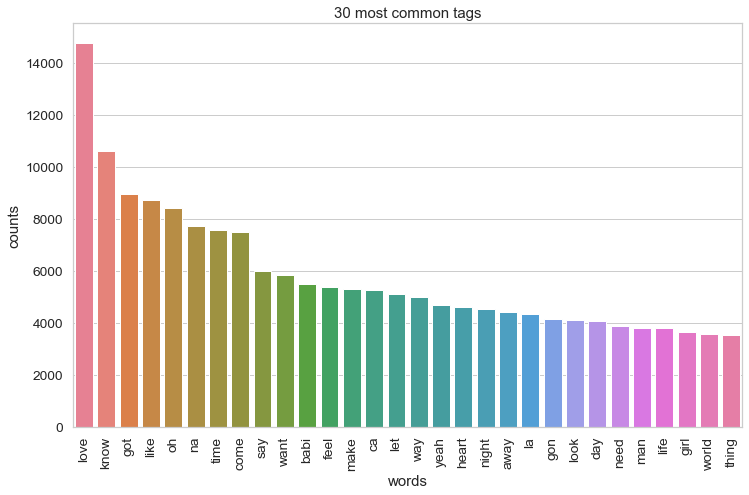

In [142]:
# Combine all the lyrics into one text
text_1980 = ' '.join(df_1980['lyric'])
# Tokenization
text_token_1980 = [i for i in text_1980.split(',') if i !='']
# Fit and transform the processed titles
count_data_1980 = count_vectorizer.fit_transform(text_token_1980)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1980, count_vectorizer)

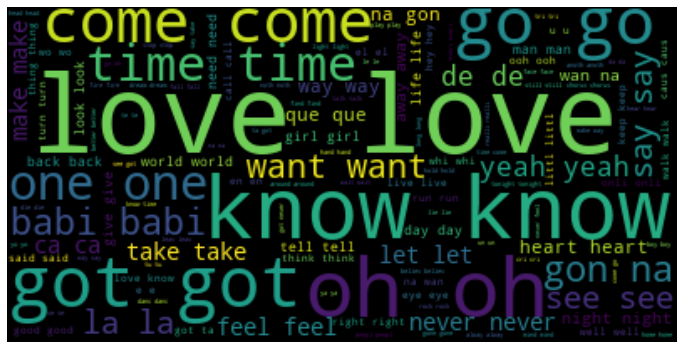

In [143]:
wordCloud_1980 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1980)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1980,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 70s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


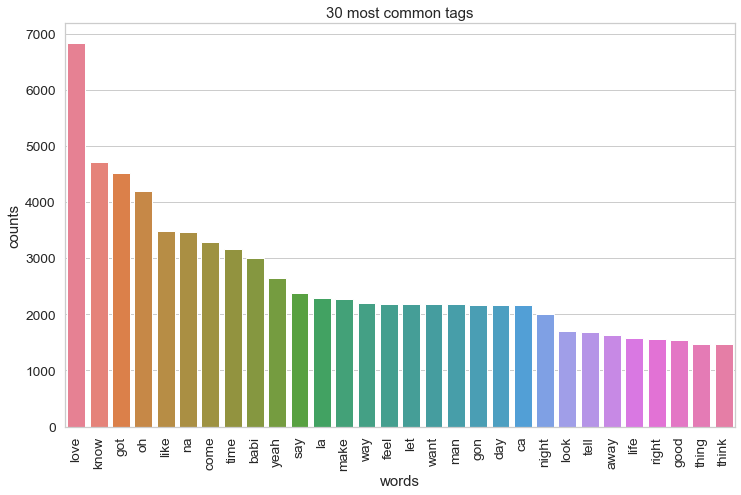

In [145]:
# Combine all the lyrics into one text
text_1970 = ' '.join(df_1970['lyric'])
# Tokenization
text_token_1970 = [i for i in text_1970.split(',') if i !='']
# Fit and transform the processed titles
count_data_1970 = count_vectorizer.fit_transform(text_token_1970)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1970, count_vectorizer)

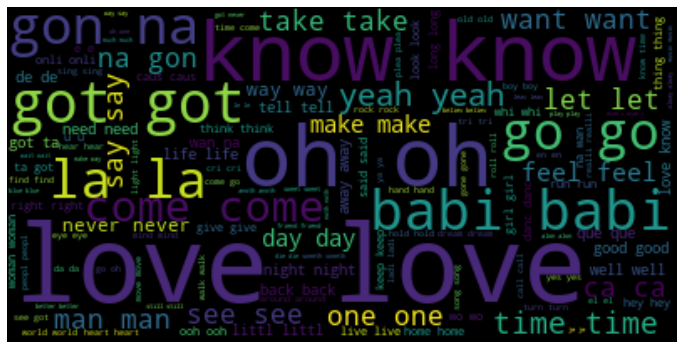

In [146]:

wordCloud_1970 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1970)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1970,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 60s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


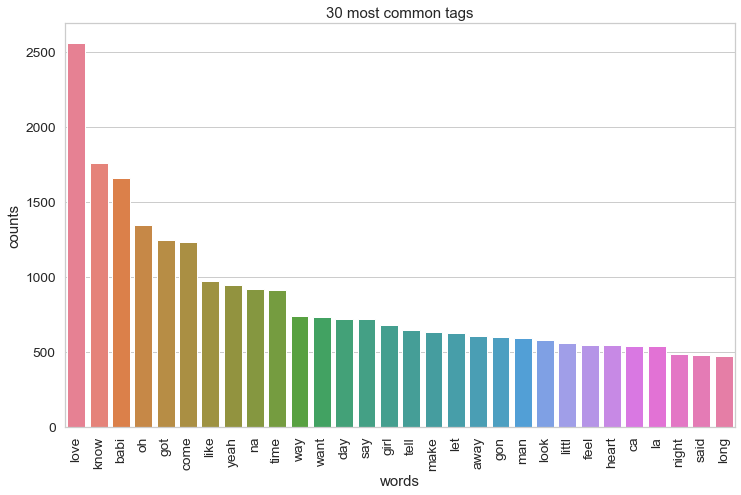

In [150]:
# Combine all the lyrics into one text
text_1960 = ' '.join(df_1960['lyric'])
# Tokenization
text_token_1960 = [i for i in text_1960.split(',') if i !='']
# Fit and transform the processed titles
count_data_1960 = count_vectorizer.fit_transform(text_token_1960)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1960, count_vectorizer)

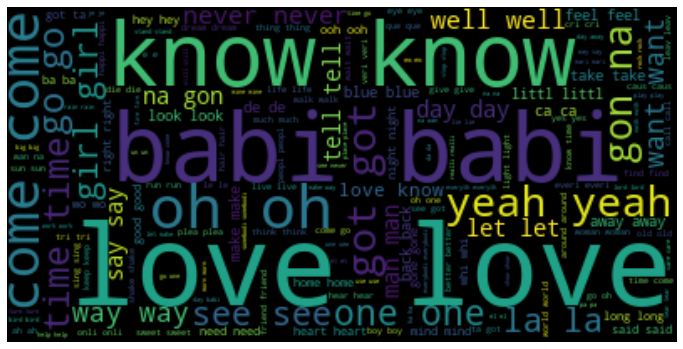

In [151]:
wordCloud_1960 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1960)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1960,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 50s or less

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


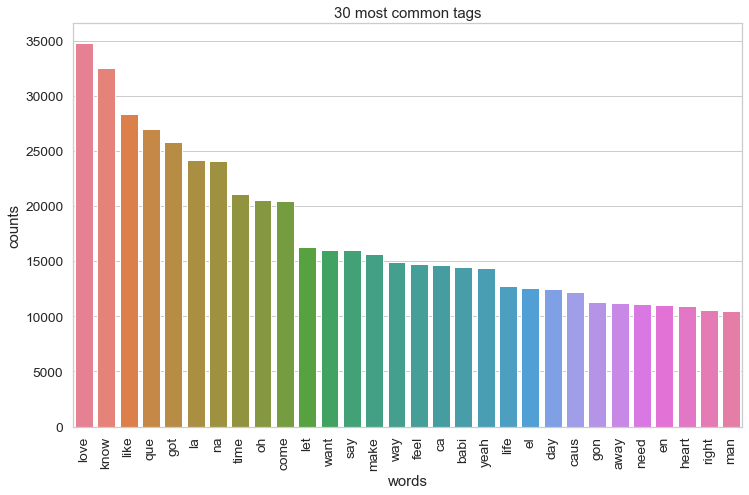

In [152]:
# Combine all the lyrics into one text
text_1950 = ' '.join(df_1950['lyric'])
# Tokenization
text_token_1950 = [i for i in text_1950.split(',') if i !='']
# Fit and transform the processed titles
count_data_1950 = count_vectorizer.fit_transform(text_token_1950)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1950, count_vectorizer)


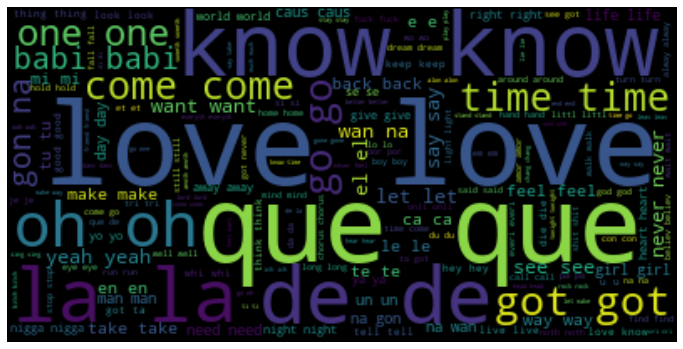

In [153]:
wordCloud_1950 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1950)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1950,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Lyric-based Recommendation System

TFIDF

Word2Vec

Latent DIrichlet Allocation (LDA)

Artist Similarity

In [154]:
data = pd.read_csv('lyrics.csv')
print(data.shape)
data.head()

(19045332, 6)


,Unnamed: 0,track_id,mxm_tid,word,count,is_test
0,0,TRAAAAV128F421A322,4623710,i,6,0
1,1,TRAAAAV128F421A322,4623710,the,4,0
2,2,TRAAAAV128F421A322,4623710,you,2,0
3,3,TRAAAAV128F421A322,4623710,to,2,0
4,4,TRAAAAV128F421A322,4623710,and,5,0


Remove stopwords for lyrics

In [155]:
# stop words
# nltk.download('stopwords')
stoplist = stopwords.words('english')

In [156]:
# remove stopwords
data['stop'] = data.apply(lambda row: row['word'] in stoplist, axis=1)

In [157]:
data.head()

,Unnamed: 0,track_id,mxm_tid,word,count,is_test,stop
0,0,TRAAAAV128F421A322,4623710,i,6,0,True
1,1,TRAAAAV128F421A322,4623710,the,4,0,True
2,2,TRAAAAV128F421A322,4623710,you,2,0,True
3,3,TRAAAAV128F421A322,4623710,to,2,0,True
4,4,TRAAAAV128F421A322,4623710,and,5,0,True


In [158]:
lyric = data.loc[data['stop'] == False, :]

In [159]:
lyric


,Unnamed: 0,track_id,mxm_tid,word,count,is_test,stop
22,22,TRAAAAV128F421A322,4623710,like,2,0,False
23,23,TRAAAAV128F421A322,4623710,de,1,0,False
27,27,TRAAAAV128F421A322,4623710,got,1,0,False
28,28,TRAAAAV128F421A322,4623710,would,1,0,False
31,31,TRAAAAV128F421A322,4623710,seem,1,0,False
...,...,...,...,...,...,...,...
19045327,19045327,TRZZZZD128F4236844,2466899,easili,1,1,False
19045328,19045328,TRZZZZD128F4236844,2466899,disast,1,1,False
19045329,19045329,TRZZZZD128F4236844,2466899,frown,1,1,False
19045330,19045330,TRZZZZD128F4236844,2466899,teas,1,1,False


In [165]:
lyric_nostop = lyric.iloc[:, 1:5]
lyric_nostop.reset_index(drop=True, inplace=True)


In [166]:
lyric_nostop


,track_id,mxm_tid,word,count
0,TRAAAAV128F421A322,4623710,like,2
1,TRAAAAV128F421A322,4623710,de,1
2,TRAAAAV128F421A322,4623710,got,1
3,TRAAAAV128F421A322,4623710,would,1
4,TRAAAAV128F421A322,4623710,seem,1
...,...,...,...,...
12789775,TRZZZZD128F4236844,2466899,easili,1
12789776,TRZZZZD128F4236844,2466899,disast,1
12789777,TRZZZZD128F4236844,2466899,frown,1
12789778,TRZZZZD128F4236844,2466899,teas,1


Before further processing, keep Track IDs in listening history, artist similarity, and lyrics datasets.

In [169]:
artist_sim = pd.read_csv('similarity.csv') # Load artist similarity data

In [175]:
artist_sim = artist_sim.groupby("target")['similar'].apply(list).reset_index(name='new')

In [176]:
artist_sim

,target,new
0,AR002UA1187B9A637D,"[ARQDOR81187FB3B06C, AROHMXJ1187B989023, ARAGW..."
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783..."
2,AR006821187FB5192B,"[ARW25O21187B991492, ARQKS2U1187FB4CFBA, ARRKD..."
3,AR009211187B989185,"[ARJRM4M1187B9B4462, ARHINI31187B995C1D, ARI0P..."
4,AR009SZ1187B9A73F4,"[ARY8CFI1187B98D5E3, ARO03MT1187B9A8F2D, AR2NW..."
...,...,...
44455,ARZZXJY1187B99E2BB,"[AREJ5K11187B993F5F, AR5AXVN1187B9A2761, ARXXX..."
44456,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6..."
44457,ARZZYRB1187B99D0B6,"[AR4XV7Y1187FB41004, ARLELZZ1187B993920, ARR0C..."
44458,ARZZYRH11C8A416A12,"[ARLSFWF12086C152F4, AR0VU8Y11C8A422C79, ARS7P..."


In [177]:
track_meta = pd.read_csv('tracks_metadata.csv') # Load track metadata


In [178]:
track_meta

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998
...,...,...,...,...,...,...,...,...,...,...,...
385251,TRYYYHG128F9343EFB,Chill,SOIDAMG12AB0182B3A,Oxygen Refreshed (Instrumentals),ARKUAXS11F4C841DEB,a6cf94d3-a1ff-4191-87cb-688b4f6a3890,Jazz Addixx,245.91628,0.481678,0.328194,0
385252,TRYYYYS12903D0605A,Way Down,SOFAXZU12AB01881C4,Way Down,ARL73HN1187B993D29,397cd952-ae9c-40cb-a504-fd0ef47ec120,Taylor Hawkins & The Coattail Riders,228.41424,0.735147,0.471100,2010
385253,TRYYYZM128F428E804,Inequality Street,SOBODSE12A8C13EBD6,No Daylights_ Nor Heeltaps,AR1I9KS1187B9AEFD4,8fe90664-ee90-4b18-b4e9-9b7cf02807bd,SKYCLAD,241.21424,0.592700,0.429545,1996
385254,TRYYYON128F932585A,Taurus (Keenhouse Remix),SOWCNSN12AB018070F,Taurus,ARWHGZD122BCFCC06A,fa50592e-ae8d-4f68-9c4d-3acdeb035227,Loose Shus,295.88853,0.517673,0.360972,0


In [179]:
artist_track = artist_sim.merge(track_meta[['track_id', 'artist_id']], how='inner', left_on='target', right_on='artist_id')

In [180]:
artist_track

,target,new,track_id,artist_id
0,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRWDPFR128F93594A6,AR003FB1187B994355
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRQCGVN128F93594B6,AR003FB1187B994355
2,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRQVTFP12903CCEE67,AR003FB1187B994355
3,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRLVUGC128F935949B,AR003FB1187B994355
4,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRSJHZL128F93594B0,AR003FB1187B994355
...,...,...,...,...
385147,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRJUDKX128F1467BC0,ARZZXT51187FB4627E
385148,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TROCCZL128F1467BC8,ARZZXT51187FB4627E
385149,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRKNGSD128E0791BDE,ARZZXT51187FB4627E
385150,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRKEFRY128E0791BE2,ARZZXT51187FB4627E


In [181]:
lyric_his = artist_track[['track_id']].merge(lyric_nostop, how='inner', on='track_id')

In [182]:
lyric_his

,track_id,mxm_tid,word,count
0,TRMZTST128E0792E44,3272695,know,19
1,TRMZTST128E0792E44,3272695,go,1
2,TRMZTST128E0792E44,3272695,see,1
3,TRMZTST128E0792E44,3272695,got,5
4,TRMZTST128E0792E44,3272695,feel,1
...,...,...,...,...
7725675,TRAGLKL12903CEDE95,9432841,hurri,2
7725676,TRAGLKL12903CEDE95,9432841,rollin,7
7725677,TRAGLKL12903CEDE95,9432841,fallin,3
7725678,TRAGLKL12903CEDE95,9432841,cheek,4


In [183]:
# Check the number of unique tracks
len(lyric_his['track_id'].unique())

142263

# Data Preprocessing
Steps:

Lyrics Stemming

Tokenization ### Stemming

In [184]:
# stemming
porter = nltk.PorterStemmer()
lyric_his['porter'] = lyric_his.apply(lambda row: porter.stem(row['word']), axis=1)

In [185]:
lyric_his


,track_id,mxm_tid,word,count,porter
0,TRMZTST128E0792E44,3272695,know,19,know
1,TRMZTST128E0792E44,3272695,go,1,go
2,TRMZTST128E0792E44,3272695,see,1,see
3,TRMZTST128E0792E44,3272695,got,5,got
4,TRMZTST128E0792E44,3272695,feel,1,feel
...,...,...,...,...,...
7725675,TRAGLKL12903CEDE95,9432841,hurri,2,hurri
7725676,TRAGLKL12903CEDE95,9432841,rollin,7,rollin
7725677,TRAGLKL12903CEDE95,9432841,fallin,3,fallin
7725678,TRAGLKL12903CEDE95,9432841,cheek,4,cheek


In [187]:
lyric_his['words'] = lyric_his.apply(lambda row: (row['porter']+' ') * row['count'], axis=1)


In [188]:
lyric_his

,track_id,mxm_tid,word,count,porter,words
0,TRMZTST128E0792E44,3272695,know,19,know,know know know know know know know know know k...
1,TRMZTST128E0792E44,3272695,go,1,go,go
2,TRMZTST128E0792E44,3272695,see,1,see,see
3,TRMZTST128E0792E44,3272695,got,5,got,got got got got got
4,TRMZTST128E0792E44,3272695,feel,1,feel,feel
...,...,...,...,...,...,...
7725675,TRAGLKL12903CEDE95,9432841,hurri,2,hurri,hurri hurri
7725676,TRAGLKL12903CEDE95,9432841,rollin,7,rollin,rollin rollin rollin rollin rollin rollin rollin
7725677,TRAGLKL12903CEDE95,9432841,fallin,3,fallin,fallin fallin fallin
7725678,TRAGLKL12903CEDE95,9432841,cheek,4,cheek,cheek cheek cheek cheek


In [189]:
lyric = lyric_his[['track_id', 'words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyrics')


In [190]:
lyric

,track_id,lyrics
0,TRAAAAV128F421A322,like like de got would seem someon under...
1,TRAAABD128F429CF47,know know know know know time time time la l...
2,TRAAAED128E0783FAB,love love love love love love love love love l...
3,TRAAAEW128F42930C0,like take would wo someth stay burn burn...
4,TRAAAFD128F92F423A,one got never feel way way take would a...
...,...,...
142258,TRZZZUK128F92E3C60,love love see see heart heart gonna gonna ...
142259,TRZZZXA128F428ED56,time la get eye think give dream wo wo ...
142260,TRZZZYV128F92E996D,get get get get get get get get get get get ge...
142261,TRZZZYX128F92D32C6,know know time time time go go go go go go g...


# Tokenization

In [191]:
# Tokenization
# nltk.download('punkt')
lyric['lyrics_token'] = lyric.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)


In [194]:
lyric.iloc[:, 0:3]

,track_id,lyrics,lyrics_token
0,TRAAAAV128F421A322,like like de got would seem someon under...,"[like, like, de, got, would, seem, someon, und..."
1,TRAAABD128F429CF47,know know know know know time time time la l...,"[know, know, know, know, know, time, time, tim..."
2,TRAAAED128E0783FAB,love love love love love love love love love l...,"[love, love, love, love, love, love, love, lov..."
3,TRAAAEW128F42930C0,like take would wo someth stay burn burn...,"[like, take, would, wo, someth, stay, burn, bu..."
4,TRAAAFD128F92F423A,one got never feel way way take would a...,"[one, got, never, feel, way, way, take, would,..."
...,...,...,...
142258,TRZZZUK128F92E3C60,love love see see heart heart gonna gonna ...,"[love, love, see, see, heart, heart, gon, na, ..."
142259,TRZZZXA128F428ED56,time la get eye think give dream wo wo ...,"[time, la, get, eye, think, give, dream, wo, w..."
142260,TRZZZYV128F92E996D,get get get get get get get get get get get ge...,"[get, get, get, get, get, get, get, get, get, ..."
142261,TRZZZYX128F92D32C6,know know time time time go go go go go go g...,"[know, know, time, time, time, go, go, go, go,..."


In [195]:
lyric.iloc[:, 0:3].to_csv('lyric_model.csv', index=False)

In [196]:

len(lyric['lyrics_token'][1])


116

# Feature Engineering

1. TF-IDF Matrix

The structure of TF-IDF Matrix:
    
Track IDs as rows

Tokens as columns

TF-IDF scores as elements

In [206]:
lyric = pd.read_csv('lyric_model.csv')

In [207]:
# tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()

tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1)) #Since the original dataset only has tokens, we can only use unigram

tfidf = tfidf_vectorizer.fit_transform(lyric['lyrics'])

In [208]:
tfidf

<142263x4788 sparse matrix of type '<class 'numpy.float64'>'
	with 7669181 stored elements in Compressed Sparse Row format>

In [209]:
142263/4

35565.75

# Topic Modeling (LDA) - Term Document Matrix

Generate token dictionary class

Generate a unique token list

Build a corpus

Generate term document matrix

Transpose the matrix and convert the numpy matrix into pandas data frame

Fit the matrix to LDA model

In [256]:
# gensim
from gensim.corpora import Dictionary
from gensim import corpora, models, similarities, matutils

